# 1. 📊 What is countplot in Seaborn?
countplot is a function in the Seaborn library.

It is used to create bar plots that show the count (frequency) of each category in a categorical column.

It is very useful for exploring categorical data.

# 2. 🎯 Why Do We Use countplot?

<table>
    <tr>
        <th>Purpose</th>
        <th>Explanation</th>
    </tr>
    <tr>
        <td>Count categories</td>
        <td>Shows how many times each category appears in your data.</td>
    </tr>
    <tr>
        <td>Quick insight</td>
        <td>Easy way to see the distribution of a categorical feature.</td>
    </tr>
    <tr>
        <td>EDA tool</td>
        <td>Commonly used in Exploratory Data Analysis (EDA).</td>
    </tr>
    <tr>
        <td>Easy to read</td>
        <td>Visualizes counts better than looking at raw numbers or tables.</td>
    </tr>
</table>

In [1]:
# import libraries
import numpy as np # for linear algrebra etc.
import pandas as pd # for data cleaning, convert to DataFrame etc.
import matplotlib.pyplot as plt # for data visaualization
import seaborn as sns # for data visualization


In [2]:
# import dataset
file_path = r"D:\DataVisualizationForPython\datasets\supermarket_sales_utf8.csv"

sales = pd.read_csv(file_path)
if sales is None:
    raise FileNotFoundError("We Ara Sorry, File Path Not Found")

df_sales = pd.DataFrame(sales)
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Mandalay,Member,Female,Food_and_beverages,54.84,3,8.226,172.746,2/20/2019,13:27:00,Credit card,164.52,4.761905,8.226,5.9
1,351-62-0822,B,Mandalay,Member,Female,Fashion_accessories,14.48,4,2.896,60.816,2019-06-02 00:00:00,18:07:00,Ewallet,57.92,4.761905,2.896,4.5
2,529-56-3974,B,Mandalay,Member,Male,Electronic_accessories,25.51,4,5.102,107.142,2019-09-03 00:00:00,17:03:00,Cash,102.04,4.761905,5.102,6.8
3,299-46-1805,B,Mandalay,Member,Female,Sports_and_travel,93.72,6,28.116,590.436,1/15/2019,16:19:00,Cash,562.32,4.761905,28.116,4.5
4,319-50-3348,B,Mandalay,Normal,Female,Home_and_lifestyle,40.30,2,4.030,84.630,2019-11-03 00:00:00,15:30:00,Ewallet,80.60,4.761905,4.030,4.4


In [3]:
# fix column names
df_sales.columns = [col.lower() for col in df_sales.columns if len(col.split(" ")) >= 1]
df_sales.columns = [col.replace(" ", "_") for col in df_sales.columns if len(col.split(" ")) >= 1]
df_sales.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,692-92-5582,B,Mandalay,Member,Female,Food_and_beverages,54.84,3,8.226,172.746,2/20/2019,13:27:00,Credit card,164.52,4.761905,8.226,5.9
1,351-62-0822,B,Mandalay,Member,Female,Fashion_accessories,14.48,4,2.896,60.816,2019-06-02 00:00:00,18:07:00,Ewallet,57.92,4.761905,2.896,4.5
2,529-56-3974,B,Mandalay,Member,Male,Electronic_accessories,25.51,4,5.102,107.142,2019-09-03 00:00:00,17:03:00,Cash,102.04,4.761905,5.102,6.8
3,299-46-1805,B,Mandalay,Member,Female,Sports_and_travel,93.72,6,28.116,590.436,1/15/2019,16:19:00,Cash,562.32,4.761905,28.116,4.5
4,319-50-3348,B,Mandalay,Normal,Female,Home_and_lifestyle,40.30,2,4.030,84.630,2019-11-03 00:00:00,15:30:00,Ewallet,80.60,4.761905,4.030,4.4


In [4]:
col_names = df_sales.columns
print(f"Column Names:\n{col_names}")

Column Names:
Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'rating'],
      dtype='object')


In [5]:
"""
for col in df_sales.columns:
    print(f"Col of {col} - dtype is: {df_sales[col].dtype}")
"""

# use list comp    
[f"Col of {col} - dtype is: {df_sales[col].dtype}" for col in df_sales.columns]

['Col of invoice_id - dtype is: object',
 'Col of branch - dtype is: object',
 'Col of city - dtype is: object',
 'Col of customer_type - dtype is: object',
 'Col of gender - dtype is: object',
 'Col of product_line - dtype is: object',
 'Col of unit_price - dtype is: float64',
 'Col of quantity - dtype is: int64',
 'Col of tax_5% - dtype is: float64',
 'Col of total - dtype is: float64',
 'Col of date - dtype is: object',
 'Col of time - dtype is: object',
 'Col of payment - dtype is: object',
 'Col of cogs - dtype is: float64',
 'Col of gross_margin_percentage - dtype is: float64',
 'Col of gross_income - dtype is: float64',
 'Col of rating - dtype is: float64']

In [ ]:
cat_cols = [col for col in df_sales.columns if df_sales[col].dtype in ["object"]]
print(cat_cols)
print(df_sales.head())

# if you want to convert date column
# drop the invoice_id column



['invoice_id', 'branch', 'city', 'customer_type', 'gender', 'product_line', 'date', 'time', 'payment']
    invoice_id branch      city customer_type  gender            product_line  \
0  692-92-5582      B  Mandalay        Member  Female      Food_and_beverages   
1  351-62-0822      B  Mandalay        Member  Female     Fashion_accessories   
2  529-56-3974      B  Mandalay        Member    Male  Electronic_accessories   
3  299-46-1805      B  Mandalay        Member  Female       Sports_and_travel   
4  319-50-3348      B  Mandalay        Normal  Female      Home_and_lifestyle   

   unit_price  quantity  tax_5%    total                 date      time  \
0       54.84         3   8.226  172.746            2/20/2019  13:27:00   
1       14.48         4   2.896   60.816  2019-06-02 00:00:00  18:07:00   
2       25.51         4   5.102  107.142  2019-09-03 00:00:00  17:03:00   
3       93.72         6  28.116  590.436            1/15/2019  16:19:00   
4       40.30         2   4.030   8

In [ ]:
# if you want to change the data type of the date column
# df_sales['date'] = pd.to_datetime(df_sales)


def standardize_date_column(df, date_col='date', output_format='YYYY-MM-DD'):
    """
    Convert date column to a consistent format.
    
    Parameters:
    - df: pandas DataFrame with the date column
    - date_col: str, name of the date column
    - output_format: str, desired output format (e.g., 'YYYY-MM-DD')
    
    Returns:
    - df: DataFrame with standardized date column
    """
    if date_col not in df.columns:
        raise ValueError(f"Column '{date_col}' not found in DataFrame")
    
    # Create a copy of the DataFrame
    df = df.copy()
    
    # Convert date column to datetime, handling mixed formats
    df[date_col] = pd.to_datetime(df[date_col], infer_datetime_format=True, errors='coerce')
    
    # Check for any parsing errors
    if df[date_col].isna().any():
        print("Warning: Some dates could not be parsed and are set to NaT.")
    
    # Format as string in desired format (e.g., YYYY-MM-DD)
    if output_format:
        df[date_col] = df[date_col].dt.strftime(
            output_format.replace('YYYY', '%Y').replace('MM', '%m').replace('DD', '%d')
        )

# use standardize_date_column
standardize_date_column(df_sales, date_col = "date")
df_sales.head()

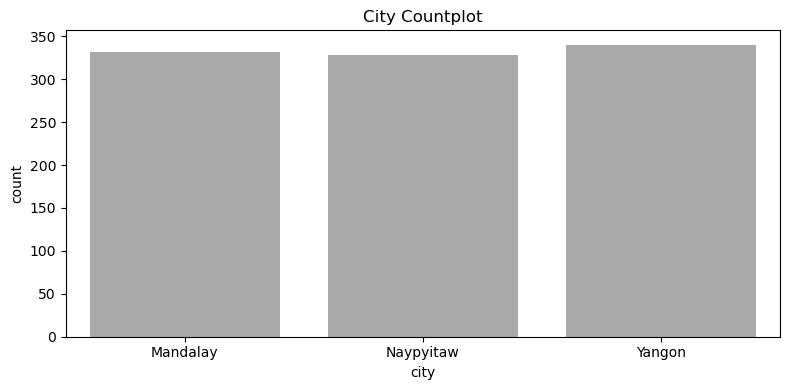

In [ ]:
# Countplot
# vertical bar
plt.figure(figsize= (8, 4))
sns.countplot(x = 'city', data = df_sales, color = "darkgray")
plt.title("Vertical Countplot of City Column")
plt.tight_layout()
plt.show()

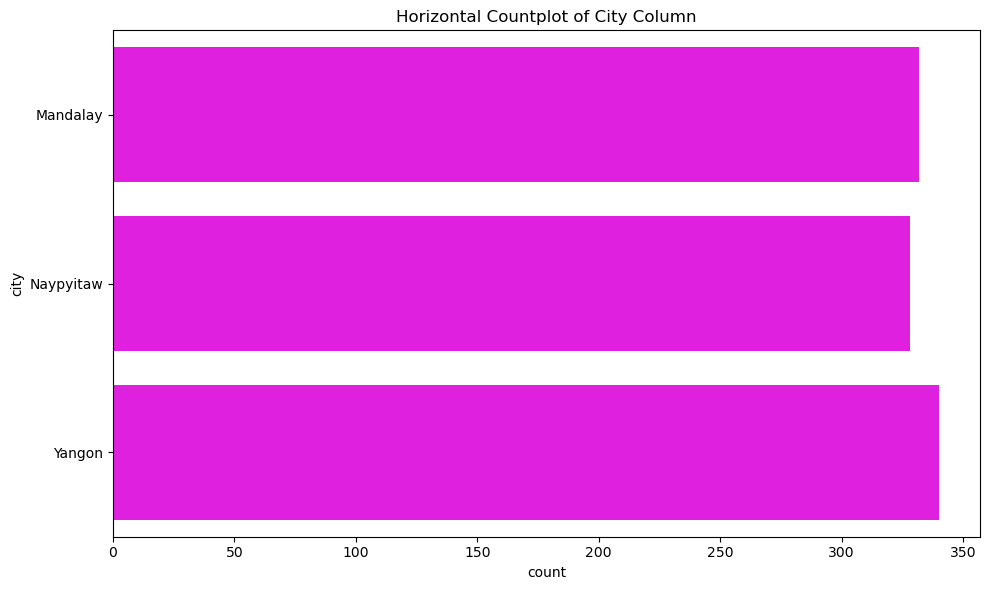

In [22]:
plt.figure(figsize= (10, 6))
sns.countplot(y = 'city', data = df_sales, color = "magenta")
plt.title("Horizontal Countplot of City Column")
plt.tight_layout()
plt.show()

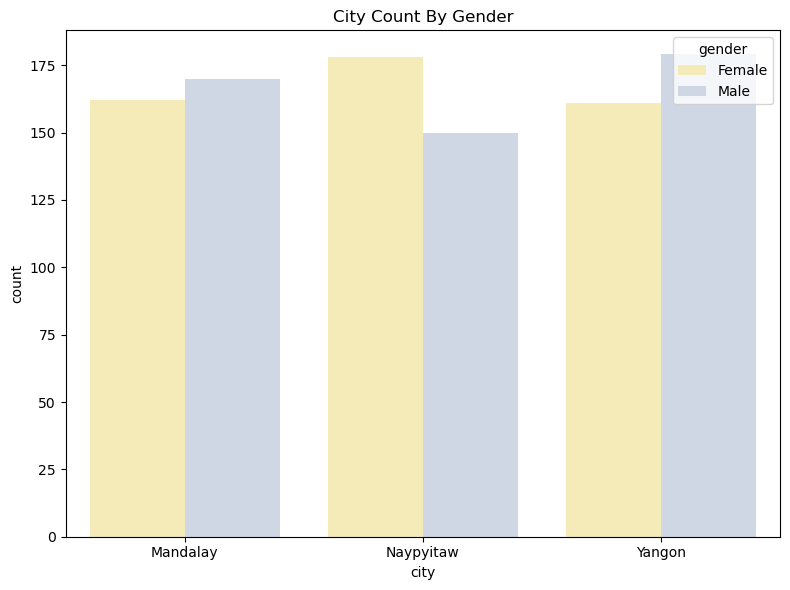

In [27]:
# Add hue to get count on two categories
plt.figure(figsize=(8,6))
plt.title("City Count By Gender")
sns.countplot(x = "city", hue = "gender", data = df_sales, palette="Pastel2_r")
plt.tight_layout()
plt.show()

In [28]:
print(df_sales["payment"].value_counts())
print("Number of unique:",df_sales["payment"].nunique())

payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64
Number of unique: 3


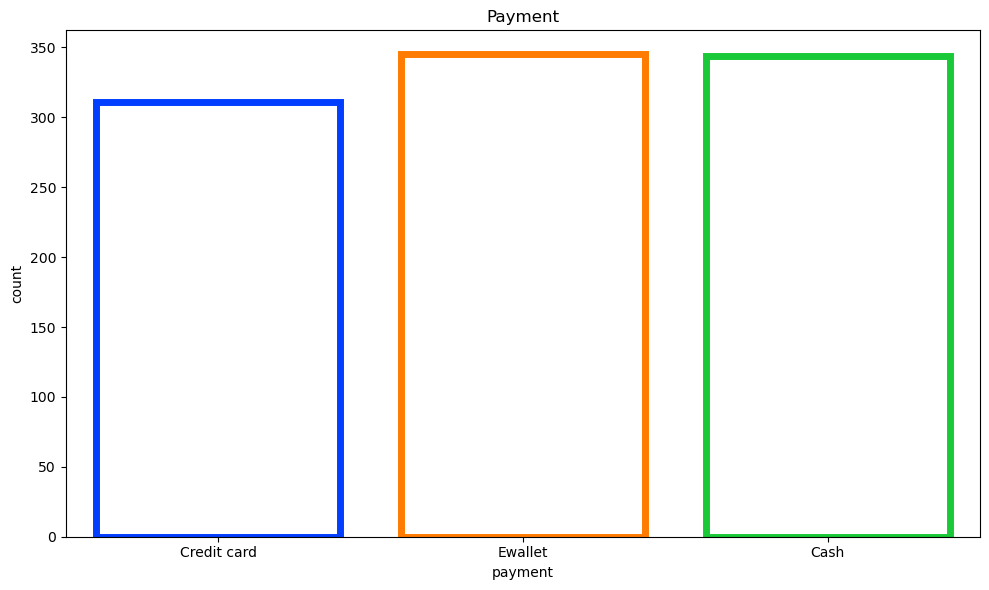

In [36]:
plt.figure(figsize = (10,6))
plt.title("Payment")
sns.countplot(x = "payment", data = df_sales, facecolor = (1, 0, 1, 0),
              linewidth = 5,
              edgecolor = sns.color_palette('bright',5))
plt.tight_layout()
plt.show()